In [305]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/data/run_data.csv")

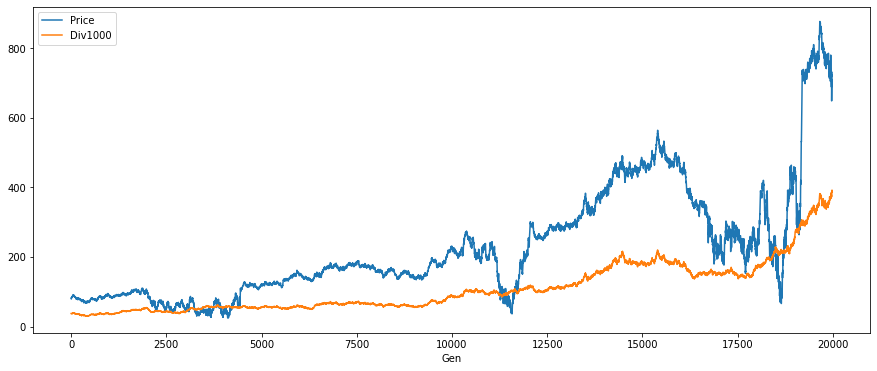

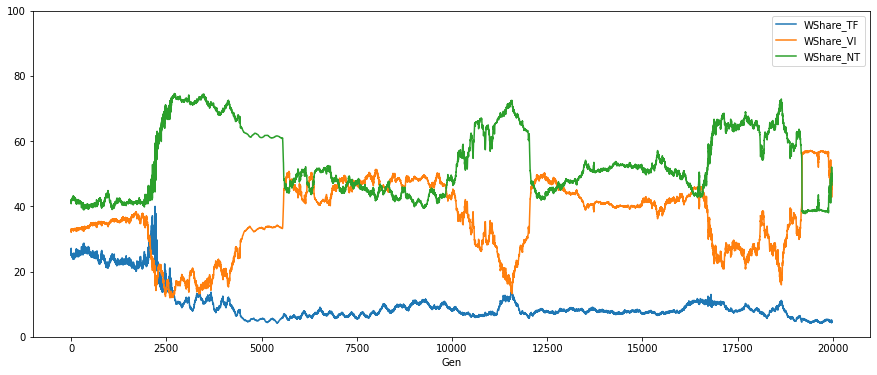

In [306]:
# df.plot(x="Gen", y = ["Price"],
#         kind="line", figsize=(15, 6))
# plt.show()

df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
0.18936602497353652 0.22884089718082795 0.13418629634042895
Annual mean returns  
[0.16616172067626148, 0.07030967772672884, 0.012672168722825337]
Annual std returns
[0.8774632128412803, 0.307242623992908, 0.09443713008276348]
T test for Rf = 0, VI vs TF
T test value VI-TF is 15.670807309328882
T test value VI-NT is -10.634727827895285
T test value TF-NT is -17.274732293330516
confidence intervals at 95%
[0.17537569039962472, 0.20335635954744832]
[0.21479395373483962, 0.2428878406268163]
[0.12025744117357798, 0.1481151515072799]
Including r = 0.01 as risk free rate
[25.128591964032896, 30.535337464957184, 17.474884899838447]


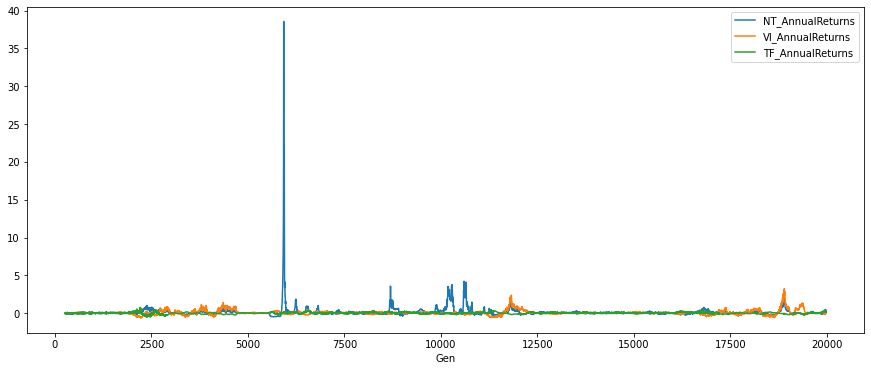

In [307]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])

print('T test for Rf = 0, VI vs TF')
df['DiffAR_VI_TF'] = df['VI_AnnualReturns'] - df['TF_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['TF_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_TF'])
obs = len(df['DiffAR_VI_TF'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-TF is ' + str(t))

df['DiffAR_VI_NT'] = df['VI_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_NT'])
obs = len(df['DiffAR_VI_NT'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-NT is ' + str(t))

df['DiffAR_TF_NT'] = df['TF_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['TF_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_TF_NT'])
obs = len(df['DiffAR_TF_NT'])
t = (srNT -srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value TF-NT is ' + str(t))


print('confidence intervals at 95%')
T = len(df['VI_AnnualReturns'])

CI_Sharpe_NT = [SharpeNT - 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T),SharpeNT + 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T)]
print(CI_Sharpe_NT)
CI_Sharpe_VI = [SharpeVI - 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T),SharpeVI + 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T)]
print(CI_Sharpe_VI)
CI_Sharpe_TF = [SharpeTF - 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T),SharpeTF + 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T)]
print(CI_Sharpe_TF)

print('Including r = 0.01 as risk free rate')

TValueNT = (SharpeNT - 0.01) / np.sqrt((1 + 0.5 * SharpeNT**2)/T)
TValueVI = (SharpeVI - 0.01) / np.sqrt((1 + 0.5 * SharpeVI**2)/T)
TValueTF = (SharpeTF - 0.01) / np.sqrt((1 + 0.5 * SharpeTF**2)/T)
print([TValueNT,TValueVI,TValueTF])


df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()



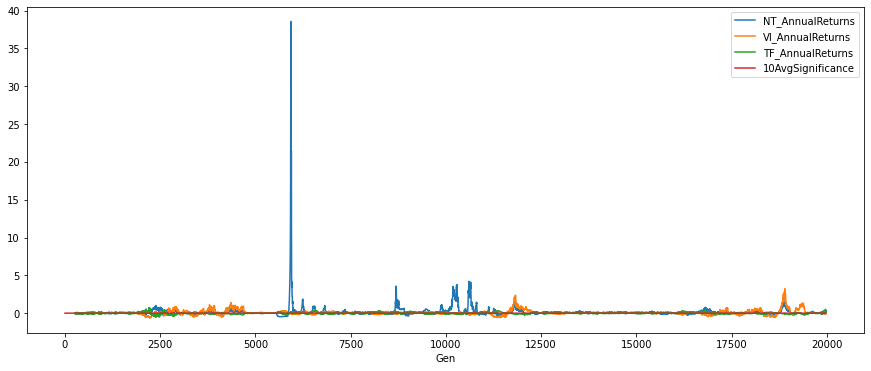

In [308]:
df['10AvgSignificance'] = 100000000 * df['AvgSignificance']
df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns", "10AvgSignificance"],
        kind="line", figsize=(15, 6))
plt.show()

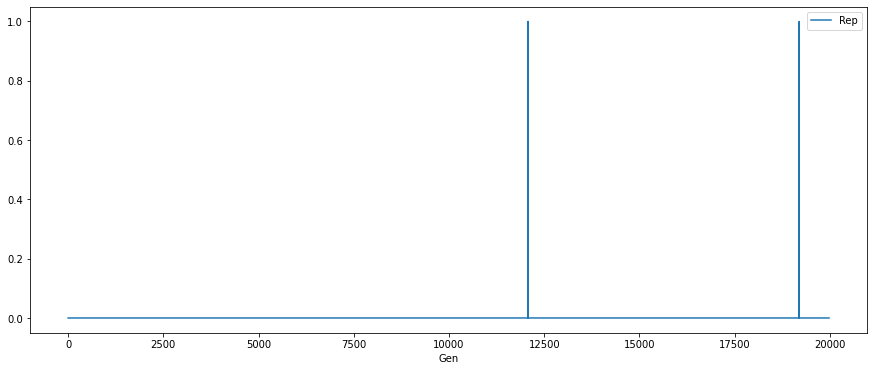

In [309]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

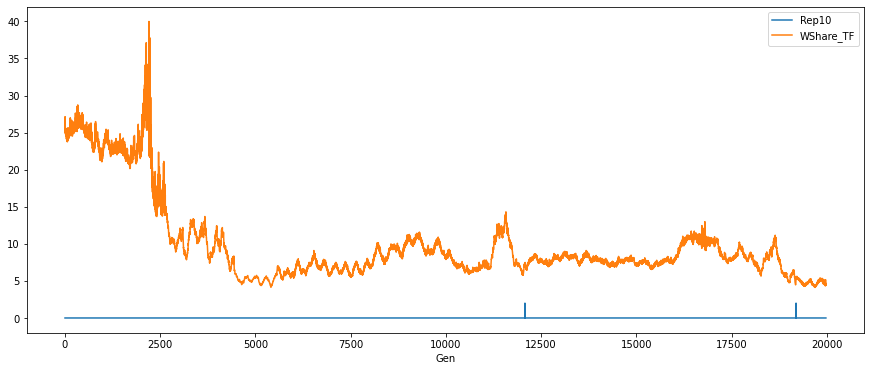

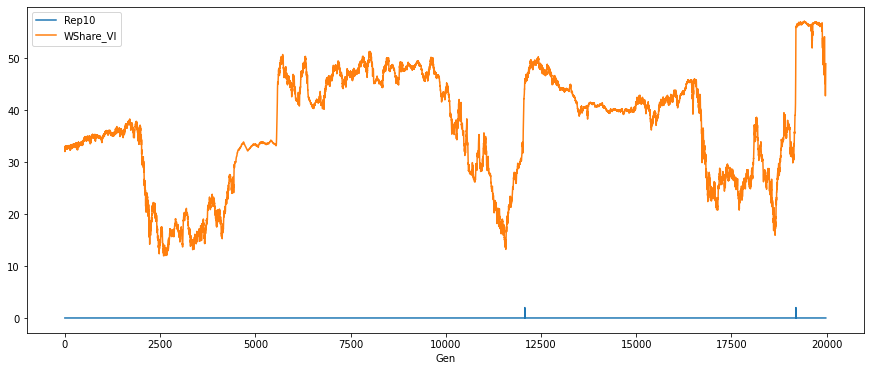

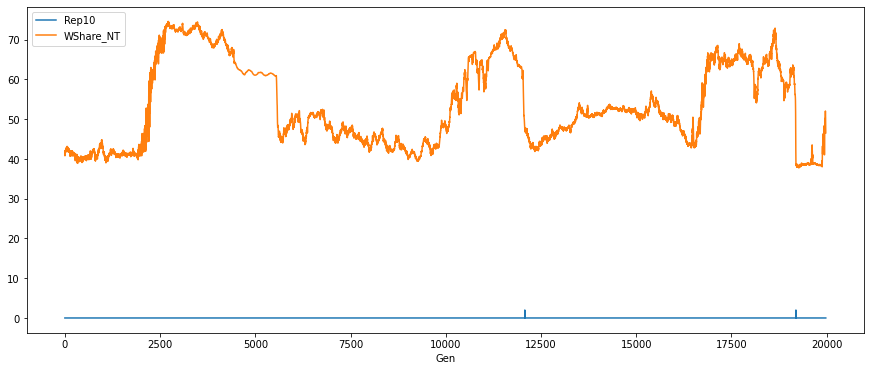

In [310]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [311]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

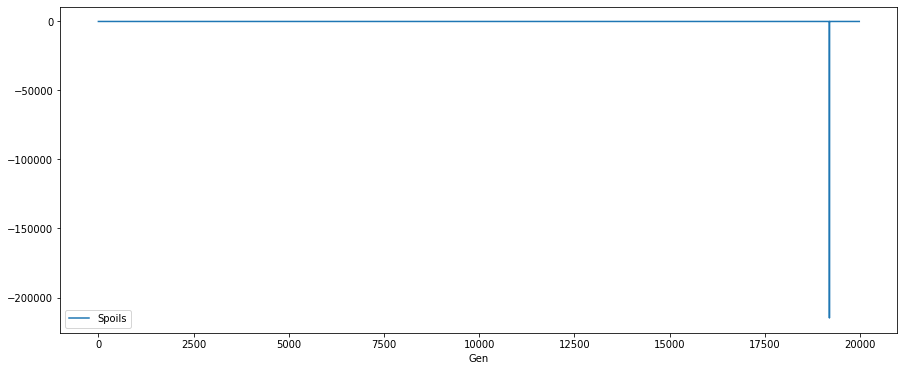

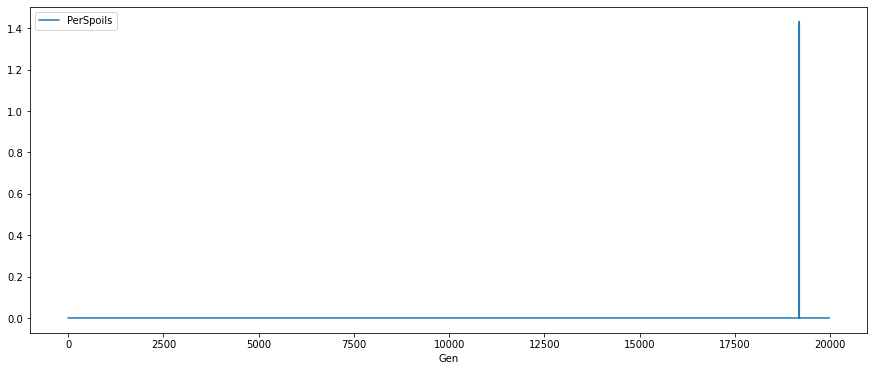

In [312]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

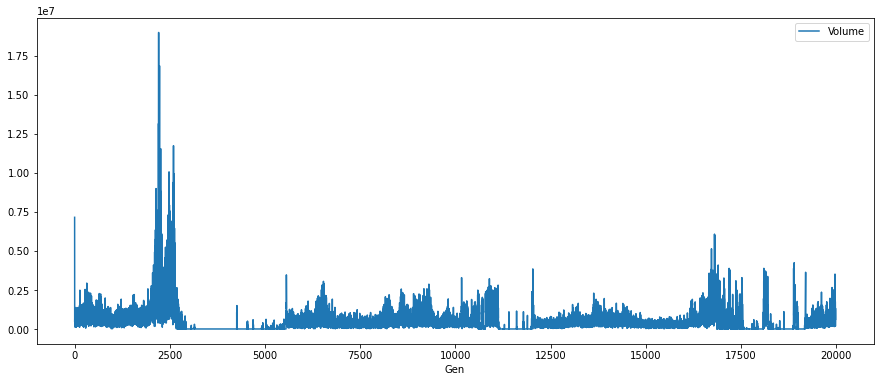

0        7.152314e+06
1        1.992328e+06
2        4.621185e+05
3        9.402437e+05
4        7.723518e+05
             ...     
19974    8.296057e+05
19975    1.765802e+05
19976    5.276293e+05
19977    1.328448e+06
19978    6.204967e+05
Name: Volume, Length: 19979, dtype: float64


In [313]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

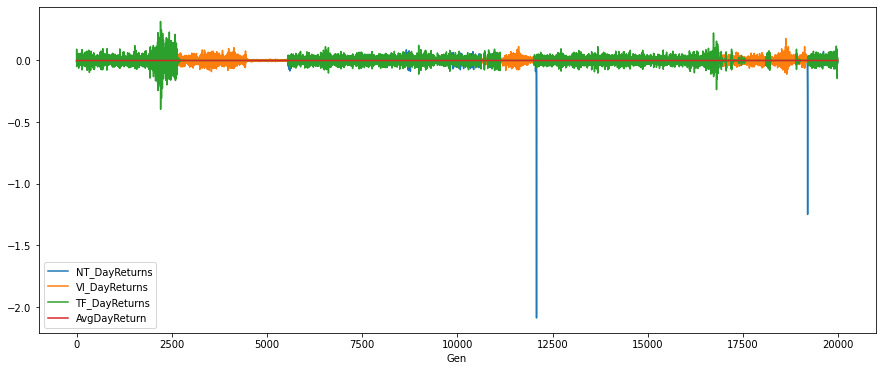

In [314]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

3.941405654892678e-17
10.656062093853594


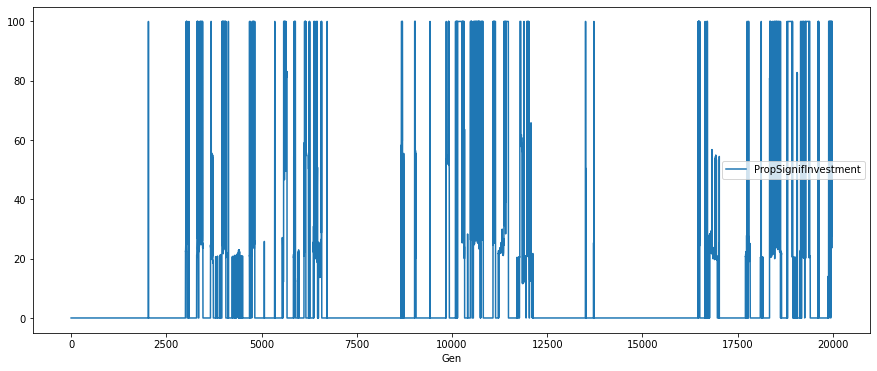

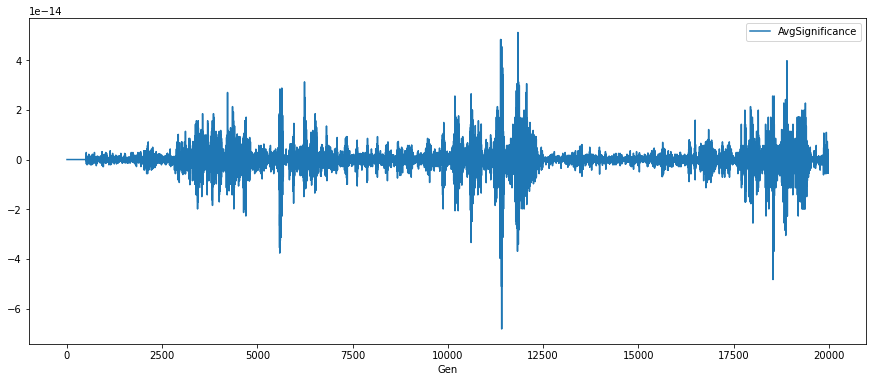

In [315]:
print(df['AvgSignificance'].mean())
print(df['PropSignifInvestment'].mean())
df.plot(x="Gen", y = ["PropSignifInvestment"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y = ["AvgSignificance"],
        kind="line", figsize=(15, 6))
plt.show()

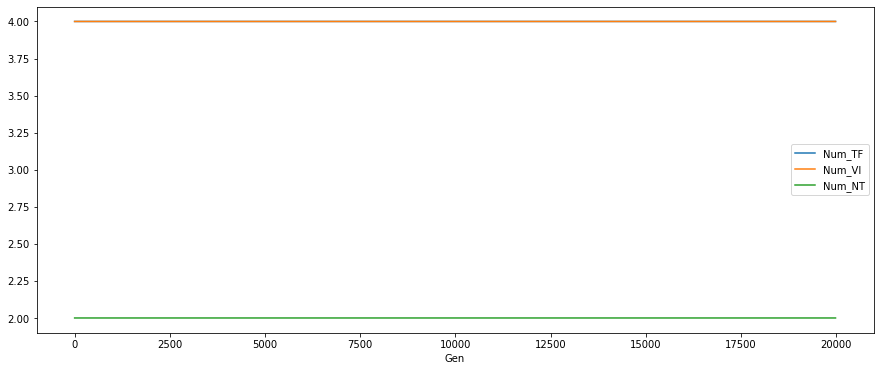

In [316]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


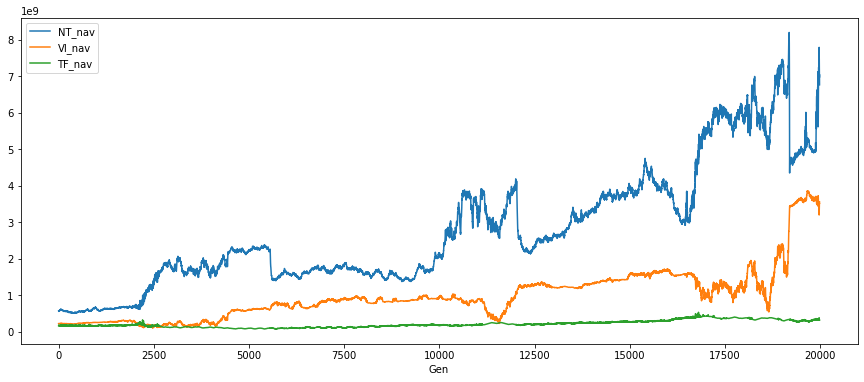

In [317]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


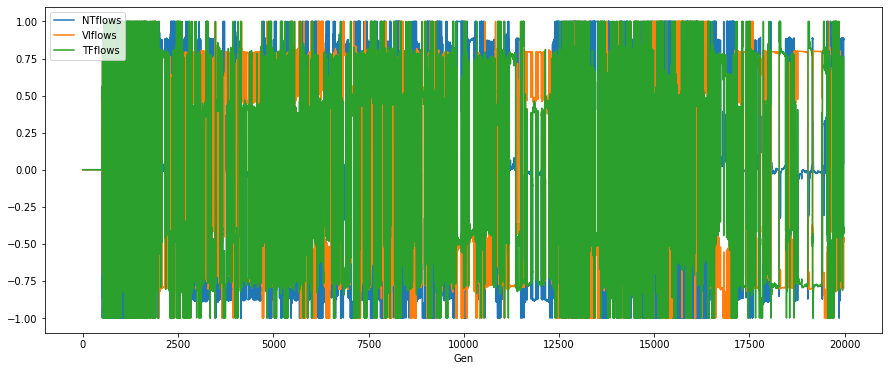

In [318]:
df.plot(x="Gen", y = ["NTflows", "VIflows", "TFflows"],
        kind="line", figsize=(15, 6))
plt.show()


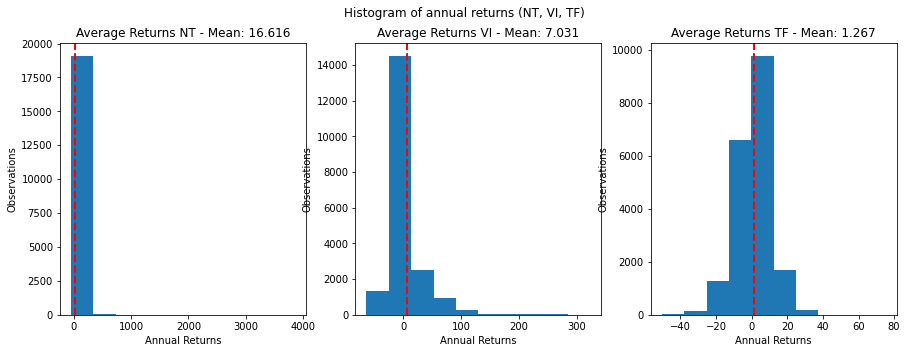

In [319]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [320]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.31356698463147736
